# Interpolation

# Load Packages

In [1]:
using Dates, Interpolations

include("printmat.jl")  

printlnPs (generic function with 2 methods)

In [2]:
using Plots

backend = "gr"              #"gr" (default), "pyplot" 

if backend == "pyplot"
    pyplot(size=(600,400))    
    default(fmt = :svg)
else    
    gr(size=(480,320))
    default(fmt = :svg)
end

# Interpolation

Interpolations are particularly useful when we repeatedly want to evaluate a function $f(x)$, or when we only know $f(x)$ for a grid of $x$ values but we have strong beliefs that the function is pretty smooth. We then do something like this:

1. Calculate $f(x)$ values for a grid of $x$. This creates a "look-up" table.
2. Replace the expensive calculations of $f(x_i)$ by interpolating $f(x_i)$ from the "look-up" table.

This notebook uses the package Interpolations (see https://github.com/JuliaMath/Interpolations.jl). As an alternative, you may consider the (more traditional) Dierckx.jl package.

## Some Data to Be Interpolated

As a simple illustration, we interpolate the sine function. (In practice, the interpolation technique is typically applied to more complicated functions.)

Notice that the approach below assumes that we supply $f(x)$ values for a *uniformly* spaced grid of $x$ values.

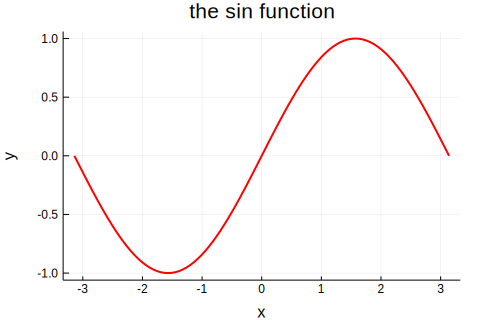

In [3]:
xGrid = range(-pi,stop=pi,length=101)  #uniformly spaced grid
yGrid = sin.(xGrid)                    #y values at xGrid 

p1 = plot(xGrid,yGrid,color=:red,linewidth=2,legend=nothing)
title!("the sin function")
xlabel!("x")
ylabel!("y")

## Interpolate

The next cell does the following

1. Calls on `interpolate(yGrid,...)` to create the "look-up" table (more precisely, create an interpolation object). It uses some of the availble interpolation options (see the documentation for more).

2. Calls on `scale()` to re-normalize the $x$ values to "natural" units, that is, those that we used in `xGrid` to create the input `yGrid`. (Motivation: `interpolate` normalizes the $x$ values to `1:length(yGrid)`.)

The second cell interpolates $y$ at some specific $x$ values.

In [4]:
itp  = interpolate(yGrid, BSpline(Quadratic(Line(OnGrid()))))
sitp = scale(itp,xGrid)             #scaling so x has "natural" units, not 1:N

println()

In [5]:
x  = [0.25,0.75]                     #to interpolate the y values at
sitp(0.75)

y_interpolated = sitp(x) 
                         
println("x, interpolated y values and true y values")
printmat([x y_interpolated sin.(x)])

x, interpolated y values and true y values
     0.250     0.247     0.247
     0.750     0.682     0.682



## Extrapolate

The next cell 

1. Calls on `extrapolate` to create an extrapolation object from the interpolation object. The `Flat` option means that 
extrapolation values (outside the $x$ range in `xGrid`) will be given the same values as end points of `yGrid` (flat extrapolation).

2. Calls on `scale()` to re-normalize the $x$ values to "natural" units.

The second cell performs extrapolation (both in- and outside the range of `xGrid` values).

In [6]:
etp  = extrapolate(itp, Flat())            #flat outside observed range of x
setp = scale(etp,xGrid)

println()

In [7]:
x2             = [1.25,pi+0.1,pi+0.5]            #to extrapolate the y values at

y_extrapolated = setp(x2)   
                            
println("x2 and extrapolated values")
printmat([x2 y_extrapolated])

x2 and extrapolated values
     1.250     0.949
     3.242     0.000
     3.642     0.000



## Looking at the Results

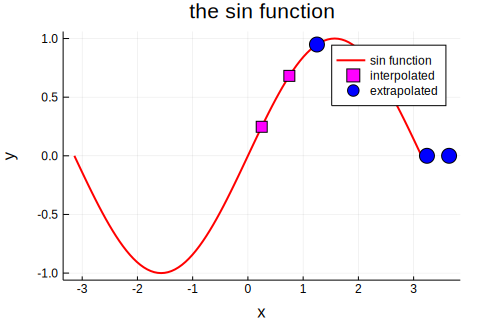

In [8]:
p1 = plot(xGrid,yGrid,color=:red,linewidth=2,label="sin function")
scatter!(x,y_interpolated,color=:magenta,markersize=5,marker=:square,label="interpolated")
scatter!(x2,y_extrapolated,color=:blue,markersize=8,label="extrapolated")
title!("the sin function")
xlabel!("x")
ylabel!("y")